In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [7]:
data = pd.read_csv('./agaricus-lepiota.csv')
data.pop('edibility')
dummies = pd.get_dummies(data)
data.head()


,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


Text(0, 0.5, 'Cumulative Explained Variance')

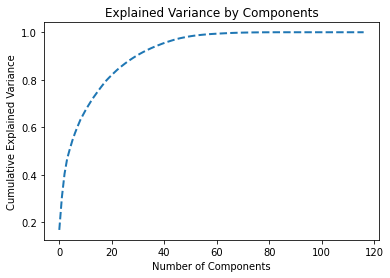

In [8]:
pca = PCA()
pca.fit(dummies)
amount = len(pca.explained_variance_ )# len() = 117
plt.figure()
plt.plot(range(0, amount), pca.explained_variance_ratio_.cumsum(), linestyle='--', linewidth=2)
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

[(2, 0.16223992558489375), (4, 0.22500242403315623), (6, 0.26975733675934394), (8, 0.28476825717534987), (10, 0.30405506146069117), (12, 0.19907018219360498), (14, 0.20971059151391802), (16, 0.1459365328311229), (18, 0.1695538365987098), (20, 0.16691965570519585), (22, 0.1691702408535507), (24, 0.17275847228021543), (26, 0.15324518291881545), (28, 0.15912594489022788)]


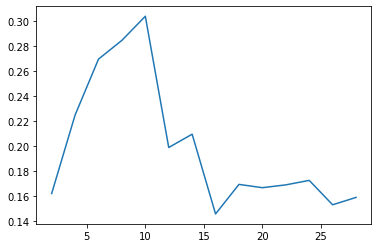

In [9]:
scores = []
for i in range (2, 30, 2):
    kmeans = KMeans(n_clusters=i, init = 'k-means++').fit(dummies)
    labels = kmeans.labels_
    score = metrics.silhouette_score(dummies, labels, metric='euclidean')
    scores.append((i, score))

ks = [value[0] for value in scores]
k_scores = [value[1] for value in scores]
print(scores)
plt.plot(ks, k_scores)

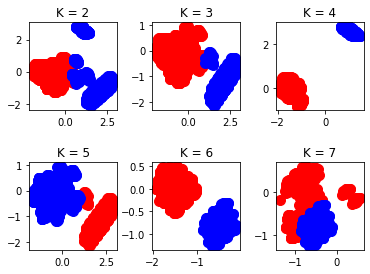

In [17]:
pca = PCA(n_components=0.8)
pca_data = pca.fit_transform(dummies)
figure, axs = plt.subplots(2,3)
plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.6, wspace=0.4)
for i in range(1,7):
    k = i+1
    x = int((i-1)/3)
    y = ((i-1)%3)
    kmeans = KMeans(n_clusters=k, init= 'k-means++')
    Ypreds = kmeans.fit_predict(pca_data)
    axs[x, y].title.set_text(f'K = {k}')
    axs[x, y].scatter(pca_data[Ypreds == 0, 0], pca_data[Ypreds == 0, 1], s = 100, c = 'red', label = 'edible')
    axs[x, y].scatter(pca_data[Ypreds == 1, 0], pca_data[Ypreds == 1, 1], s = 100, c = 'blue', label = 'poisonous')
plt.show()